<a href="https://colab.research.google.com/github/Laeliatikoh18/Pengelolaan_Data_Penduduk/blob/master/%5BW6W7W8_AUG22%5D_Laeli_Atikoh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Customer Segmentation

# Dataset
Users Dataset

key information about registered users in the platform
https://docs.google.com/spreadsheets/d/1OMPbwJT8gKo1EZLdjCqL_hx6kx2J3QtjN9g_dcw344A/edit#gid=661268201

Daily User Balance Dataset

information on user-level mutual fund balance, available on a daily basis
https://docs.google.com/spreadsheets/d/1dzorxQB1mZ48CL_Mg8aZv5_gr8WACx-Tu_hzx57gG4M/edit#gid=356211032



# Libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import datetime as dt
import seaborn as sns
from sklearn import cluster
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
# import math

## Users Dataset
### Import Data

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1OMPbwJT8gKo1EZLdjCqL_hx6kx2J3QtjN9g_dcw344A/edit#gid=661268201'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
df = pd.read_csv(sheet_url_trf)
df

https://docs.google.com/spreadsheets/d/1OMPbwJT8gKo1EZLdjCqL_hx6kx2J3QtjN9g_dcw344A/export?format=csv&gid=661268201


,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 1:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 7:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 9:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


# Data Information

*   user_id	: Client ID on the platform
*   registration_import_datetime =	Registration time and date at UTC+7 timezone (WIB)
*   user_gender =	User self-identified gender
*   user_age=	User self-identified age
*   user_occupation=	User self-identified job
*   user_income_range=	User self-identified income range
*   referral_code_used=	If user enter referral code during registration, the value is "used referral"; else will be Null valued (none)
*   user_income_source =	User self-declared source of income











### Handling Missing Values

In [ ]:
df_us = df.copy()
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


mengecek format data 

In [ ]:
df_us.isna().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
dtype: int64

terdapat 9108 code referal yang kosong, 
lalu di isi dengan none untuk memberikan keterangan bahwa user tersebut tidak mengisi refferal code 

In [ ]:
df_us['referral_code_used'] = df_us['referral_code_used'].fillna('NONE')
df_us.isna().sum()

user_id                         0
registration_import_datetime    0
user_gender                     0
user_age                        0
user_occupation                 0
user_income_range               0
referral_code_used              0
user_income_source              0
dtype: int64

dapat dilihat sudah tidak ada colom yang kosong

### Convert Data types

mengconvert tanggal regristrasi ke format datetime, dan ambil data tanggalnya saja 

In [ ]:
#Convert String to Datetime
df_us['registration_import_datetime']= pd.to_datetime(df_us['registration_import_datetime'])
df_us['registration_import_date']= pd.to_datetime(df_us['registration_import_datetime']).dt.date
df_us.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  int64         
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
 8   registration_import_date      14712 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.0+ MB


convert data date to datetime

In [ ]:
df_us['registration_import_date']= pd.to_datetime(df_us['registration_import_date'])
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  int64         
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
 8   registration_import_date      14712 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 1.0+ MB


mengahpus kolom registrasi data karna ada timenya, tidak digunakan

In [ ]:
df_us.drop(['registration_import_datetime'],axis=1,inplace=True)

### Duplicate Values

tidak ada data duplicate

In [ ]:
df_us.duplicated().sum()

0

### Typos

In [ ]:
df_us.head()

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,registration_import_date
0,162882,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NONE,Gaji,2021-09-17
1,3485491,Female,55,Others,> Rp 50 Juta - 100 Juta,NONE,Gaji,2021-10-09
2,1071649,Male,50,Swasta,Rp 10 Juta - 50 Juta,NONE,Gaji,2021-10-08
3,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,NONE,Gaji,2021-08-12
4,3802293,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,2021-08-15


In [ ]:
df_us.columns

Index(['user_id', 'user_gender', 'user_age', 'user_occupation',
       'user_income_range', 'referral_code_used', 'user_income_source',
       'registration_import_date'],
      dtype='object')

In [ ]:
for col in df_us.columns:
  print(col)

user_id
user_gender
user_age
user_occupation
user_income_range
referral_code_used
user_income_source
registration_import_date


In [ ]:
for i in df_us.columns:
  unique_data = df_us[i].value_counts()
  print(unique_data,'\n')

162882     1
4297940    1
4267551    1
4407058    1
4270595    1
          ..
3771510    1
3847659    1
3763751    1
3878306    1
4401986    1
Name: user_id, Length: 14712, dtype: int64 

Male      8977
Female    5735
Name: user_gender, dtype: int64 

21    1192
20    1058
23    1031
19     972
22     963
24     901
25     792
18     771
26     744
27     668
28     605
29     553
30     458
31     415
32     346
33     280
17     268
34     262
35     262
36     229
37     194
38     166
39     162
42     143
41     138
40     129
43     107
44      90
49      82
46      81
45      80
48      75
47      68
51      58
52      57
50      48
54      47
53      38
55      34
56      32
57      24
58      15
59      13
60      10
64       9
61       8
62       7
63       6
65       5
67       3
71       3
66       3
69       2
76       1
74       1
73       1
83       1
82       1
Name: user_age, dtype: int64 

Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pen

dapat dilihat tidak ada data typo atau kesalahan ketik, sehingga tidak ada yg perlu d perbaiki

### Handling Outliers

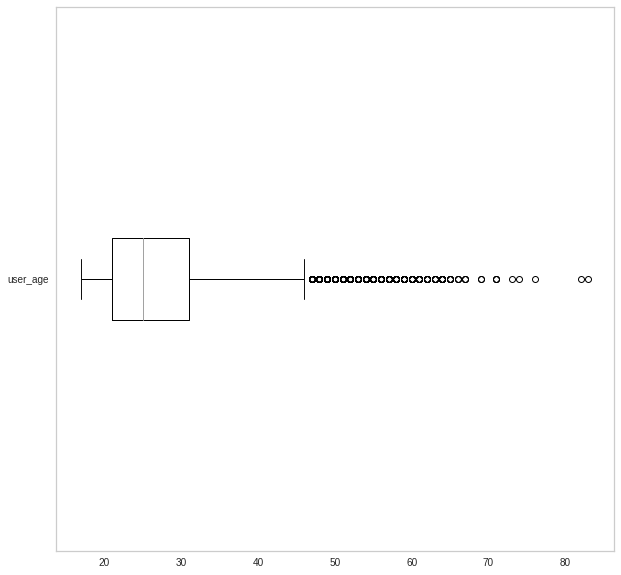

In [ ]:
df_us.boxplot(column=['user_age'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)

terdapat outliers, namun memilih untuk mempertahan data karena dari segi umur berapapun tidak dibatasi untuk investasi ataupun menanam saham

## Daily User Balance Dataset
### Import Data

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1dzorxQB1mZ48CL_Mg8aZv5_gr8WACx-Tu_hzx57gG4M/edit#gid=356211032'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
df1 = pd.read_csv(sheet_url_trf)
df1


https://docs.google.com/spreadsheets/d/1dzorxQB1mZ48CL_Mg8aZv5_gr8WACx-Tu_hzx57gG4M/export?format=csv&gid=356211032


,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.0,10000000.0,NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158808,4165630,2021-09-30,41625.0,40000.0,NaN,10001.0,10000.0,NaN,49869.0,50000.0,NaN,NaN,NaN,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.0,10000.0,NaN,NaN,NaN,NaN


# Data Information


*   user_id	Client =ID on the platform
*   date=	Date of the user balance
*   Saham_AUM=	AUM of equity mutual fund held by client to date
*   Saham_invested_amount=	The total price paid by client to buy equity mutual fund to date.
*   Saham_transaction_amount=	Total value of transaction to buy (if positive) or sell (if negative) equity mutual fund on the date. If there's no transaction, the value should be 0 or NA
*   Pasar_Uang_AUM=	AUM of money market mutual fund held by client to date
*   Pasar_Uang_invested_amount=	The total price paid by client to buy money market mutual fund to date
*   Pasar_Uang_transaction_amount=	Total value of transaction to buy (if positive) or sell (if negative) money market mutual fund on the date. If there's no transaction, the value should be 0 or NA
*   Pendapatan_Tetap_AUM=	AUM of fixed income mutual fund held by client to date
*   Pendapatan_Tetap_invested_amount=	The total price paid by client to buy fixed income mutual fund to date
*   Pendapatan_Tetap_transaction_amount=	Total value of transaction to buy (if positive) or sell (if negative) fixed income mutual fund on the date. If there's no transaction, the value should be 0 or NA
*   Campuran_AUM=	AUM of mixed mutual fund held by client to date
*   Campuran_invested_amount=	The total price paid by client to buy mixed mutual fund to date
*   Campuran_transaction_amount=	Total value of transaction to buy (if positive) or sell (if negative) mixed mutual fund on the date. If there's no transaction, the value should be 0 or NA







### Handling Missing Values

cek format data apakah sesuai atau tidak

In [ ]:
df1_daily_user = df1.copy()
df1_daily_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 

In [ ]:
df1_daily_user.isna().sum()

user_id                                     0
date                                        0
Saham_AUM                               52519
Saham_invested_amount                   52519
Saham_transaction_amount                57972
Pasar_Uang_AUM                          27730
Pasar_Uang_invested_amount              27730
Pasar_Uang_transaction_amount           34538
Pendapatan_Tetap_AUM                    52865
Pendapatan_Tetap_invested_amount        52865
Pendapatan_Tetap_transaction_amount     58314
Campuran_AUM                           153459
Campuran_invested_amount               153459
Campuran_transaction_amount            153694
dtype: int64

terdapat beberapa kolom yang kosong,

 berhubung data yang kosong berupa numbering maka kolom yang kosong dapat di isi dengan 0

In [ ]:
df1_daily_user = df1_daily_user.fillna(0)
df1_daily_user.isna().sum()

user_id                                0
date                                   0
Saham_AUM                              0
Saham_invested_amount                  0
Saham_transaction_amount               0
Pasar_Uang_AUM                         0
Pasar_Uang_invested_amount             0
Pasar_Uang_transaction_amount          0
Pendapatan_Tetap_AUM                   0
Pendapatan_Tetap_invested_amount       0
Pendapatan_Tetap_transaction_amount    0
Campuran_AUM                           0
Campuran_invested_amount               0
Campuran_transaction_amount            0
dtype: int64

setelah di cek lagi sudah tidak ada kolom yang kosong

### Convert Data types

mengubah format data yang tidak sesuai,

 yaitu date yang tadinya string di ubah menjadi datetime agar dapat di olah datanya

In [ ]:
df1_daily_user['date'] = pd.to_datetime(df1_daily_user['date'])
df1_daily_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            158811 non-null  float64       
 3   Saham_invested_amount                158811 non-null  float64       
 4   Saham_transaction_amount             158811 non-null  float64       
 5   Pasar_Uang_AUM                       158811 non-null  float64       
 6   Pasar_Uang_invested_amount           158811 non-null  float64       
 7   Pasar_Uang_transaction_amount        158811 non-null  float64       
 8   Pendapatan_Tetap_AUM                 158811 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     158811 non-null  float64       
 

In [ ]:
# df1_daily_user = df1_daily_user.astype({"Saham_AUM":'int',"Saham_invested_amount":'int',"Saham_transaction_amount":'int',"Pasar_Uang_AUM":'int',"Pasar_Uang_invested_amount":'int',"Pasar_Uang_transaction_amount":'int',"Pendapatan_Tetap_AUM":'int',"Pendapatan_Tetap_invested_amount":'int',"Pendapatan_Tetap_transaction_amount":'int',"Campuran_AUM":'int',"Campuran_invested_amount":'int',"Campuran_transaction_amount":'int'})

### Duplicate Values

tidak ada data duplicate

In [ ]:
df1_daily_user.duplicated().sum()

0

### Typos

In [ ]:
for i in df1_daily_user.columns:
  unique_data = df1_daily_user[i].value_counts()
  print(unique_data,'\n')

3734324    42
3736817    42
3734576    42
3734536    42
3736922    42
           ..
4078289     1
1905565     1
4143822     1
4143651     1
4165830     1
Name: user_id, Length: 8277, dtype: int64 

2021-09-30    8277
2021-09-29    8007
2021-09-28    7593
2021-09-27    7416
2021-09-24    7257
2021-09-23    7094
2021-09-22    6921
2021-09-21    6488
2021-09-20    6368
2021-09-17    6190
2021-09-16    6024
2021-09-15    5841
2021-09-14    5405
2021-09-13    5237
2021-09-10    5038
2021-09-09    4862
2021-09-08    4674
2021-09-07    4200
2021-09-06    4032
2021-09-03    3830
2021-09-02    3584
2021-09-01    3428
2021-08-31    3075
2021-08-30    2926
2021-08-27    2774
2021-08-26    2643
2021-08-25    2528
2021-08-24    2227
2021-08-23    2095
2021-08-20    1973
2021-08-19    1768
2021-08-17    1474
2021-08-18    1474
2021-08-16    1350
2021-08-13    1117
2021-08-12     991
2021-08-11     991
2021-08-10     577
2021-08-09     426
2021-08-06     315
2021-08-05     204
2021-08-04     117
Name

tidak ada typo atau kesalahan ketik

### Handling Outliers

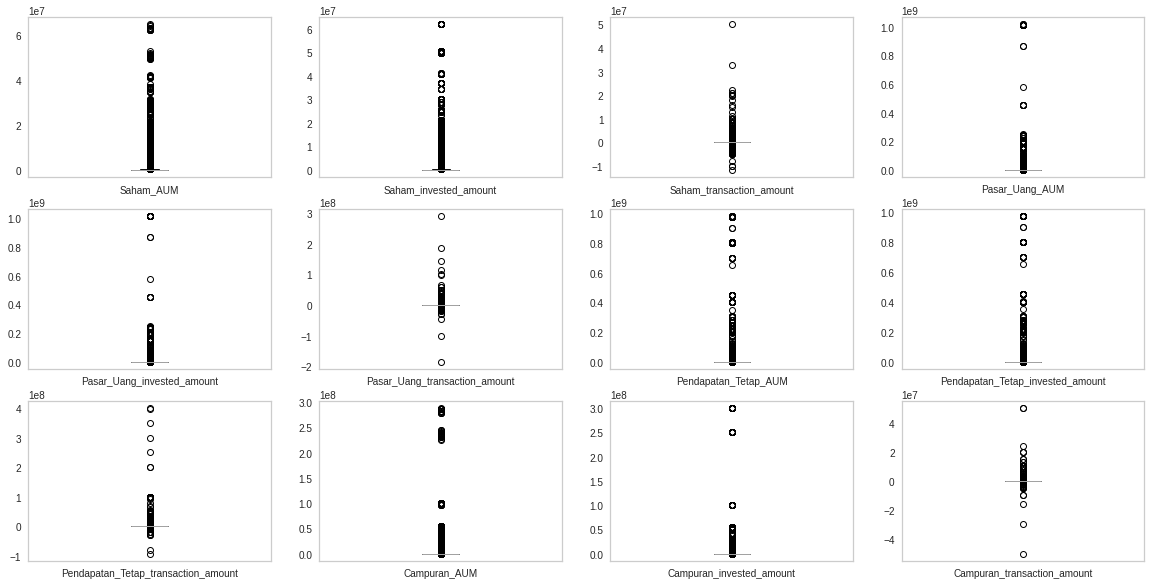

In [ ]:
numerical_column = ['Saham_AUM','Saham_invested_amount','Saham_transaction_amount','Pasar_Uang_AUM','Pasar_Uang_invested_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount','Pendapatan_Tetap_transaction_amount','Campuran_AUM','Campuran_invested_amount','Campuran_transaction_amount']

fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20,10))
for i, el in enumerate(numerical_column):
    df1_daily_user.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

dapat dilihat dari boxplot terdapat beberapa outliers, namum memilih untuk mempertahankan dan tidak menghapus data outliers karena memperngaruhi perhitungan ivestasi untuk di analisa

### MERGE DATA

menggabungkan data user dan data daily balance

In [ ]:
df_join = df_us.merge(df1_daily_user, how = 'inner', on='user_id')
df_join

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,registration_import_date,date,Saham_AUM,...,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,NONE,Gaji,2021-08-12,2021-08-17,189109.0,...,0.0,40012.0,40000.0,0.0,270084.0,270000.0,0.0,0.0,0.0,0.0
1,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,NONE,Gaji,2021-08-12,2021-08-18,188542.0,...,0.0,40022.0,40000.0,0.0,270399.0,270000.0,0.0,0.0,0.0,0.0
2,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,NONE,Gaji,2021-08-12,2021-08-19,185228.0,...,0.0,40028.0,40000.0,0.0,270426.0,270000.0,0.0,0.0,0.0,0.0
3,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,NONE,Gaji,2021-08-12,2021-08-20,184354.0,...,0.0,40034.0,40000.0,0.0,270175.0,270000.0,0.0,0.0,0.0,0.0
4,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,NONE,Gaji,2021-08-12,2021-08-23,186365.0,...,0.0,40047.0,40000.0,0.0,270315.0,270000.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NONE,Keuntungan Bisnis,2021-08-22,2021-09-24,9900685.0,...,0.0,10112541.0,10100000.0,0.0,40989215.0,41000000.0,0.0,0.0,0.0,0.0
158807,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NONE,Keuntungan Bisnis,2021-08-22,2021-09-27,9911149.0,...,0.0,10116412.0,10100000.0,0.0,41010237.0,41000000.0,0.0,0.0,0.0,0.0
158808,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NONE,Keuntungan Bisnis,2021-08-22,2021-09-28,10018447.0,...,0.0,10117871.0,10100000.0,0.0,41013869.0,41000000.0,0.0,0.0,0.0,0.0
158809,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NONE,Keuntungan Bisnis,2021-08-22,2021-09-29,20161402.0,...,10000000.0,10119204.0,10100000.0,0.0,40998525.0,41000000.0,0.0,0.0,0.0,0.0


In [ ]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   user_gender                          158811 non-null  object        
 2   user_age                             158811 non-null  int64         
 3   user_occupation                      158811 non-null  object        
 4   user_income_range                    158811 non-null  object        
 5   referral_code_used                   158811 non-null  object        
 6   user_income_source                   158811 non-null  object        
 7   registration_import_date             158811 non-null  datetime64[ns]
 8   date                                 158811 non-null  datetime64[ns]
 9   Saham_AUM                            158811 non-null  float64       
 

## EDA

### Descriptive Statistic

In [ ]:
# Define Eda_df as copy of new_df
df_EDA = df_join.copy()

# Data descriptive
stdv_df = df_EDA[['user_age','Saham_AUM','Saham_invested_amount','Saham_transaction_amount','Pasar_Uang_AUM','Pasar_Uang_invested_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount','Pendapatan_Tetap_transaction_amount','Campuran_AUM','Campuran_invested_amount','Campuran_transaction_amount']].describe()

# Add kurtosis, skewness and variance row for data descriptice statistic
stdv_df.loc['kurtosis'] = df_EDA[['user_age','Saham_AUM','Saham_invested_amount','Saham_transaction_amount','Pasar_Uang_AUM','Pasar_Uang_invested_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount','Pendapatan_Tetap_transaction_amount','Campuran_AUM','Campuran_invested_amount','Campuran_transaction_amount']].kurt() #show kurtosis statistic
stdv_df.loc['skewness'] = df_EDA[['user_age','Saham_AUM','Saham_invested_amount','Saham_transaction_amount','Pasar_Uang_AUM','Pasar_Uang_invested_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount','Pendapatan_Tetap_transaction_amount','Campuran_AUM','Campuran_invested_amount','Campuran_transaction_amount']].skew() #show Skewness statistic
stdv_df.loc['variance'] = df_EDA[['user_age','Saham_AUM','Saham_invested_amount','Saham_transaction_amount','Pasar_Uang_AUM','Pasar_Uang_invested_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount','Pendapatan_Tetap_transaction_amount','Campuran_AUM','Campuran_invested_amount','Campuran_transaction_amount']].var() #show variance statistic
stdv_df

,user_age,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
count,158811.000000,1.588110e+05,1.588110e+05,1.588110e+05,1.588110e+05,1.588110e+05,1.588110e+05,1.588110e+05,1.588110e+05,1.588110e+05,1.588110e+05,1.588110e+05,1.588110e+05
mean,27.201774,2.974978e+05,2.960576e+05,7.110494e+03,6.955849e+05,6.940755e+05,1.705964e+04,1.193030e+06,1.189113e+06,3.640097e+04,2.532126e+05,2.632041e+05,2.227484e+03
std,8.579667,1.770372e+06,1.759649e+06,2.710200e+05,1.284331e+07,1.281471e+07,1.301468e+06,1.921726e+07,1.913287e+07,2.346995e+06,4.573587e+06,4.815056e+06,2.892536e+05
min,17.000000,0.000000e+00,0.000000e+00,-1.176680e+07,0.000000e+00,0.000000e+00,-1.850000e+08,0.000000e+00,0.000000e+00,-9.271240e+07,0.000000e+00,0.000000e+00,-5.000000e+07
25%,21.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,25.000000,1.008300e+04,1.000000e+04,0.000000e+00,1.001900e+04,1.000000e+04,0.000000e+00,2.501700e+04,2.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,31.000000,1.005060e+05,1.000000e+05,0.000000e+00,1.001110e+05,1.000000e+05,0.000000e+00,1.101590e+05,1.100000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,83.000000,6.445433e+07,6.184000e+07,5.000000e+07,1.016171e+09,1.012200e+09,2.892000e+08,9.797670e+08,9.700000e+08,4.000000e+08,2.878238e+08,3.000000e+08,5.000000e+07
kurtosis,2.526286,4.141059e+02,4.091279e+02,1.043268e+04,4.769540e+03,4.768813e+03,2.264969e+04,1.706657e+03,1.701208e+03,1.706223e+04,2.400440e+03,2.456404e+03,1.865332e+04
skewness,1.520676,1.735977e+01,1.726944e+01,7.650000e+01,6.380977e+01,6.380735e+01,8.893919e+01,3.837545e+01,3.831767e+01,1.174049e+02,4.427912e+01,4.489911e+01,4.013027e+01


dari 158811 data 
rata rata user age umur 27
minimal umur 17
maksimal umur 83

,Saham AUM rata ratanya 297497,81
standar deviasi 1770372.24
nilai minimalnya 0
nilai maksimalnya 64454332

Text(0, 0.5, 'Frequencies')

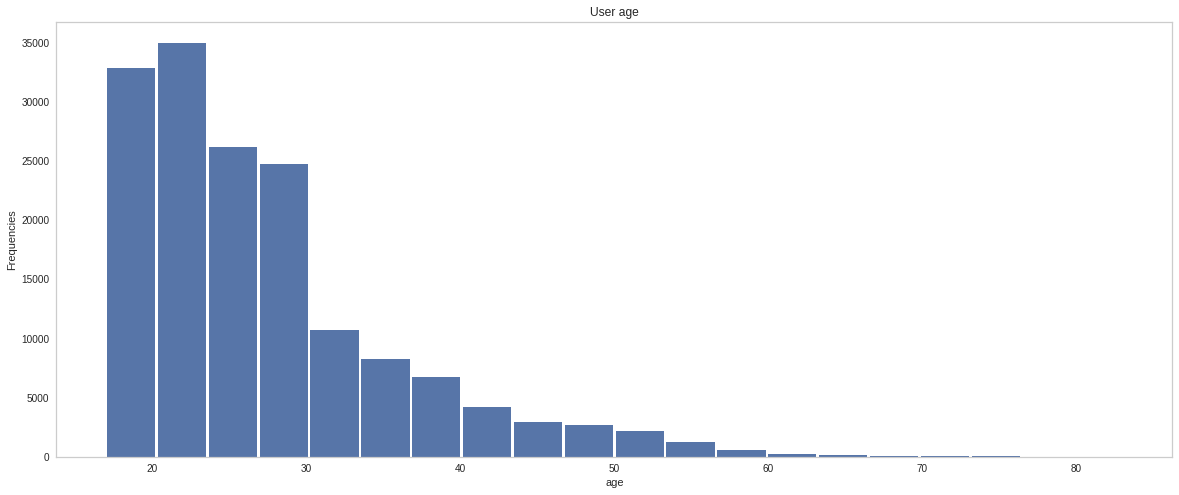

In [ ]:
PayV_Hist = df_EDA['user_age'].hist(bins=20, grid=False, figsize=(20,8), color='#5775a8', rwidth=0.95)

# Labeling
plt.title('User age')
plt.xlabel('age')
plt.ylabel('Frequencies')

In [ ]:
df_join[['user_gender',	'user_occupation',	'user_income_range',	'referral_code_used',	'user_income_source'	]].describe()

,user_gender,user_occupation,user_income_range,referral_code_used,user_income_source
count,158811,158811,158811,158811,158811
unique,2,9,6,2,10
top,Male,Pelajar,< 10 Juta,NONE,Gaji
freq,97149,88865,68500,107440,99611


### End of period
 AUM, invested amount per user





In [ ]:
df_c = df_join.copy()

In [ ]:
daily_fill = df_c [
      (df_c['date'] == '2021-08-31')|
      (df_c['date']== '2021-09-30')
].reset_index(drop=True)

In [ ]:
daily_fill_aum = daily_fill.loc[:,['user_id','date','Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM']]
daily_fill_inv = daily_fill.loc[:,['user_id','date','Saham_invested_amount','Pasar_Uang_invested_amount','Pendapatan_Tetap_invested_amount','Campuran_invested_amount']]
# daily_fill_trans = daily_fill.loc[:,['user_id','date','Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount']]

In [ ]:
daily_fill_aum = daily_fill.groupby(['user_id','date'])[['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM']].sum()
daily_fill_inv = daily_fill.groupby(['user_id','date'])[['Saham_invested_amount','Pasar_Uang_invested_amount','Pendapatan_Tetap_invested_amount','Campuran_invested_amount']].sum()
# daily_fill_trans = daily_fill_trans.groupby(['user_id','date'])[['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount']].sum()

In [ ]:
daily_fill_aum = pd.DataFrame(daily_fill_aum.T.sum()).rename(columns={0: 'End_of_Periode_AUM'}).reset_index()
daily_fill_inv = pd.DataFrame(daily_fill_inv.T.sum()).rename(columns={0: 'End_of_Periode_INV'}).reset_index()
# daily_fill_trans = pd.DataFrame(daily_fill_trans.T.sum()).rename(columns={0: 'End_of_Periode_Trans'}).reset_index()

In [ ]:
df_merge = pd.merge(daily_fill_inv,daily_fill_aum,  how= 'inner',on = ['user_id','date'])

In [ ]:
df_merge = pd.merge(daily_fill,df_merge,  how= 'inner', on = ['user_id','date'])

In [ ]:
# df_merge = pd.merge(df_merge,daily_fill_trans,  how= 'inner', on = ['user_id','month'])

In [ ]:
df_merge

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,registration_import_date,date,Saham_AUM,...,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,End_of_Periode_INV,End_of_Periode_AUM
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,NONE,Gaji,2021-08-12,2021-08-31,186071.0,...,40000.0,0.0,271881.0,270000.0,0.0,0.0,0.0,0.0,500000.0,498042.0
1,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,NONE,Gaji,2021-08-12,2021-09-30,297141.0,...,40000.0,0.0,270673.0,270000.0,0.0,0.0,0.0,0.0,600000.0,608049.0
2,3802293,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,2021-08-15,2021-08-31,3246984.0,...,500000.0,0.0,1207984.0,1200000.0,0.0,0.0,0.0,0.0,5000000.0,4955937.0
3,3802293,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,2021-08-15,2021-09-30,9232900.0,...,1350000.0,0.0,3229577.0,3230000.0,0.0,0.0,0.0,0.0,13500000.0,13816490.0
4,3049927,Male,53,Swasta,< 10 Juta,NONE,Gaji,2021-08-29,2021-09-30,41545.0,...,10000.0,0.0,49925.0,50000.0,0.0,910285.0,899000.0,149000.0,999000.0,1011752.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,3670811,Male,49,Swasta,> Rp 50 Juta - 100 Juta,NONE,Gaji,2021-08-02,2021-08-31,106802.0,...,130000.0,0.0,95075.0,95000.0,25000.0,0.0,0.0,0.0,335000.0,332162.0
11348,3670811,Male,49,Swasta,> Rp 50 Juta - 100 Juta,NONE,Gaji,2021-08-02,2021-09-30,208469.0,...,130000.0,0.0,95113.0,95000.0,0.0,0.0,0.0,0.0,435000.0,434258.0
11349,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,NONE,Gaji,2021-08-11,2021-08-31,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11350,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,NONE,Gaji,2021-08-11,2021-09-30,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


End of period AUM per user

In [ ]:
daily_fill_aum

,user_id,date,End_of_Periode_AUM
0,50701,2021-08-31,10206945.0
1,50701,2021-09-30,9943587.0
2,50961,2021-08-31,1016223.0
3,50961,2021-09-30,4163510.0
4,53759,2021-08-31,100911.0
...,...,...,...
11347,4165020,2021-09-30,0.0
11348,4165132,2021-09-30,10001.0
11349,4165630,2021-09-30,101495.0
11350,4165704,2021-09-30,9987.0


End of period Inves per user

In [ ]:
daily_fill_inv

,user_id,date,End_of_Periode_INV
0,50701,2021-08-31,10000000.0
1,50701,2021-09-30,10000000.0
2,50961,2021-08-31,1000000.0
3,50961,2021-09-30,4100000.0
4,53759,2021-08-31,100000.0
...,...,...,...
11347,4165020,2021-09-30,0.0
11348,4165132,2021-09-30,10000.0
11349,4165630,2021-09-30,100000.0
11350,4165704,2021-09-30,10000.0


### AVG profit per user

In [ ]:
df_merge ['Profit'] =  df_merge['End_of_Periode_AUM'] - df_merge['End_of_Periode_INV']

In [ ]:
df_merge_profit = df_merge.loc[:,['user_id','Profit']]
df_merge_profit = df_merge_profit.groupby(['user_id','Profit']).mean().reset_index()

In [ ]:
df_merge_profit.columns = ['user_id','Avg_profit']

In [ ]:
df_merge_profit

,user_id,Avg_profit
0,50701,-56413.0
1,50701,206945.0
2,50961,16223.0
3,50961,63510.0
4,53759,911.0
...,...,...
10846,4165020,0.0
10847,4165132,1.0
10848,4165630,1495.0
10849,4165704,-13.0


In [ ]:
# numerical_column = ['End_of_Periode_AUM','End_of_Periode_INV'	,'End_of_Periode_Trans']

# fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
# for i, el in enumerate(numerical_column):
#     df_merge.boxplot(el, ax=axes.flatten()[i],grid=False)
# plt.show()

### TOTAL USER
total user yang ada di data

In [ ]:
df_us['user_id'].nunique()

14712

In [ ]:
def get_month(x): return dt.datetime(x.year, x.month, 1)

In [ ]:
df_c['month'] = df_c['date'].apply(get_month) 

### monthly TOTAL transaction per user

total transaksi amount user per bulan



In [ ]:
trans_total = pd.DataFrame(df_c.groupby(['user_id', 'month'])['Saham_transaction_amount', 'Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount', 'Campuran_transaction_amount'].sum().T.sum()).reset_index().rename(columns={0:'Total_trans'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
trans_total

,user_id,month,Total_trans
0,50701,2021-08-01,0.0
1,50701,2021-09-01,0.0
2,50961,2021-08-01,0.0
3,50961,2021-09-01,3100000.0
4,53759,2021-08-01,0.0
...,...,...,...
11347,4165020,2021-09-01,0.0
11348,4165132,2021-09-01,0.0
11349,4165630,2021-09-01,0.0
11350,4165704,2021-09-01,0.0


### Trend of Transaction AUG-SEPT

In [ ]:
trans_to = pd.DataFrame(df_c.groupby(['date'])[['Saham_transaction_amount', 'Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount', 'Campuran_transaction_amount']].sum().T.sum()).reset_index().rename(columns={0:'Total_trans'})
trans_to

,date,Total_trans
0,2021-08-04,0.0
1,2021-08-05,13870000.0
2,2021-08-06,19755070.0
3,2021-08-09,-16839132.0
4,2021-08-10,-163427291.0
5,2021-08-11,286740163.0
6,2021-08-12,-13331504.0
7,2021-08-13,396038255.0
8,2021-08-16,443347553.0
9,2021-08-17,33010509.0


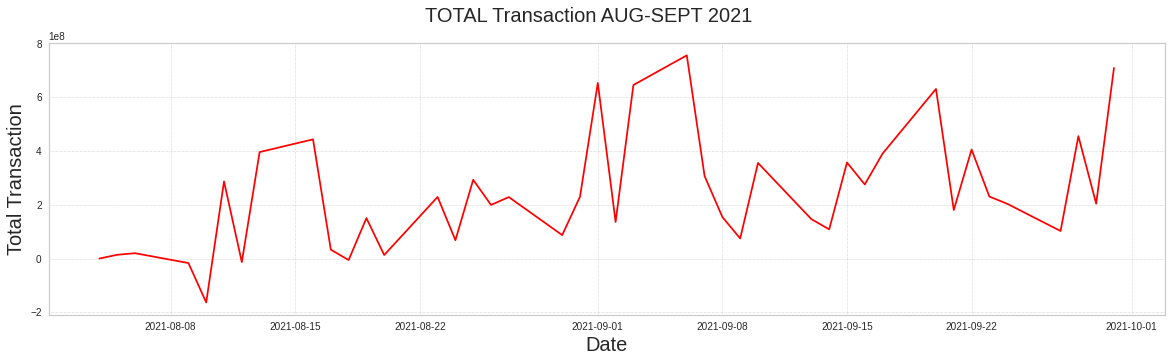

In [ ]:
fig = plt.figure(figsize=(20, 5))

fig.suptitle('TOTAL Transaction AUG-SEPT 2021', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Transaction', fontsize=20)

x = trans_to['date']
y = trans_to['Total_trans']
mean = y.mean()

plt.plot(x, y, color = 'red')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show()

### %Monthly of Transaction

In [ ]:
trans_total_m = pd.DataFrame(df_c.groupby(['month'])[['Saham_transaction_amount', 'Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount', 'Campuran_transaction_amount']].sum().T.sum()).reset_index().rename(columns={0:'Total_trans'})
trans_total_m

,month,Total_trans
0,2021-08-01,2.491803e+09
1,2021-09-01,7.481304e+09


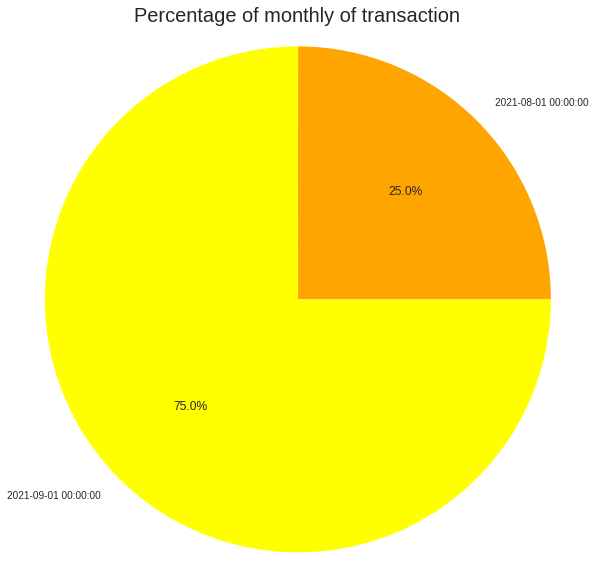

In [ ]:
plt.figure(figsize=(10, 10))

data = trans_total_m['Total_trans']
labels = trans_total_m['month']

plt.pie(data,labels=labels,autopct='%1.1f%%',colors=('orange','yellow'))
plt.title('Percentage of monthly of transaction', fontsize=20)
plt.axis('equal')
plt.show()

### end of period transaction per user

In [ ]:
tot = df_c.groupby(['user_id', 'month'])[['Saham_transaction_amount', 'Pasar_Uang_transaction_amount', 'Pendapatan_Tetap_transaction_amount', 'Campuran_transaction_amount']].sum()

In [ ]:
tot.reset_index(inplace=True)

In [ ]:
trans_negativ = df_c[
    (df_c['Saham_transaction_amount'] < 0) |
    (df_c['Pasar_Uang_transaction_amount'] < 0) |
    (df_c['Pendapatan_Tetap_transaction_amount'] < 0) |
    (df_c['Campuran_transaction_amount'] < 0)
]

trans_positiv = df_c[
    (df_c['Saham_transaction_amount'] > 0) |
    (df_c['Pasar_Uang_transaction_amount'] > 0) |
    (df_c['Pendapatan_Tetap_transaction_amount'] > 0) |
    (df_c['Campuran_transaction_amount'] > 0)
]

end of period negative transaction per user 

In [ ]:
trans_negativ = pd.DataFrame(trans_negativ.groupby(['user_id', 'month'])[['Saham_transaction_amount', 'Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount', 'Campuran_transaction_amount']].sum().T.sum()).reset_index().rename(columns={0:'Total_trans_negativ'})
trans_positiv = pd.DataFrame(trans_positiv.groupby(['user_id', 'month'])[['Saham_transaction_amount', 'Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount', 'Campuran_transaction_amount']].sum().T.sum()).reset_index().rename(columns={0:'Total_trans_positiv'})

In [ ]:
trans_negativ

,user_id,month,Total_trans_negativ
0,61414,2021-08-01,-10000.0
1,71229,2021-08-01,-4300000.0
2,71229,2021-09-01,-700000.0
3,72676,2021-09-01,-20760.0
4,82753,2021-08-01,-150000.0
...,...,...,...
2664,4151790,2021-09-01,-10000.0
2665,4154421,2021-09-01,-10000.0
2666,4154865,2021-09-01,-10000.0
2667,4157054,2021-09-01,-10000.0


end of period positive transaction per user

In [ ]:
trans_positiv

,user_id,month,Total_trans_positiv
0,50961,2021-09-01,3100000.0
1,54759,2021-09-01,2000000.0
2,66145,2021-09-01,140000.0
3,67251,2021-09-01,1000000.0
4,72676,2021-09-01,120613.0
...,...,...,...
4139,4147464,2021-09-01,20000.0
4140,4148505,2021-09-01,100000.0
4141,4148714,2021-09-01,10000.0
4142,4149156,2021-09-01,100000.0


In [ ]:
# trans_join = trans_negativ.merge(trans_positiv, how = 'inner', on = ['user_id','month'])
# trans_join

In [ ]:
# trans_totpn = pd.DataFrame(trans_join.groupby(['user_id', 'month'])[['Total_trans_negativ','Total_trans_positiv']].sum().T.sum()).reset_index().rename(columns={0:'Total_trans'})
# trans_join = trans_join.merge(trans_totpn, how = 'inner', on = ['user_id','month'])
# trans_join

In [ ]:
# total_trans = trans_negativ['Total_trans_negativ'] + trans_positiv['Total_trans_positiv']
# total_trans

### average AUM per user

In [ ]:
df_uh = df_c.groupby('user_id')['Saham_AUM', 'Pasar_Uang_AUM', 'Pendapatan_Tetap_AUM', 'Campuran_AUM'].mean()
df_uh

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Saham_AUM,Pasar_Uang_AUM,Pendapatan_Tetap_AUM,Campuran_AUM
user_id,,,,
50701,0.000000e+00,0.000000e+00,0.000000,9960726.875
50961,1.698977e+06,1.263463e+05,252246.260870,0.000
53759,7.065243e+04,1.001464e+04,20065.321429,0.000
54759,0.000000e+00,1.010642e+07,0.000000,0.000
61414,5.447027e+02,0.000000e+00,0.000000,0.000
...,...,...,...,...
4165020,0.000000e+00,0.000000e+00,0.000000,0.000
4165132,0.000000e+00,1.000100e+04,0.000000,0.000
4165630,4.162500e+04,1.000100e+04,49869.000000,0.000


### TOTAL AUM per user

In [ ]:
tot_aum = pd.DataFrame(df_c.groupby(['user_id'])[['Saham_AUM', 'Pasar_Uang_AUM', 'Pendapatan_Tetap_AUM', 'Campuran_AUM']].sum().T.sum()).reset_index().rename(columns={0:'Total_AUM'})
tot_aum

,user_id,Total_AUM
0,50701,239057445.0
1,50961,47784103.0
2,53759,2820507.0
3,54759,252660536.0
4,61414,20154.0
...,...,...
8272,4165020,0.0
8273,4165132,10001.0
8274,4165630,101495.0
8275,4165704,9987.0


### Trend of AUM AUG-SEPT

In [ ]:
tot_aum_d = pd.DataFrame(df_c.groupby(['date'])[['Saham_AUM', 'Pasar_Uang_AUM', 'Pendapatan_Tetap_AUM', 'Campuran_AUM']].sum().T.sum()).reset_index().rename(columns={0:'Total_AUM'})
tot_aum_d

,date,Total_AUM
0,2021-08-04,5.446918e+07
1,2021-08-05,1.292247e+08
2,2021-08-06,2.887515e+08
3,2021-08-09,5.442568e+08
4,2021-08-10,4.881894e+08
5,2021-08-11,1.999325e+09
6,2021-08-12,1.989621e+09
7,2021-08-13,2.527380e+09
8,2021-08-16,3.213335e+09
9,2021-08-17,3.479424e+09


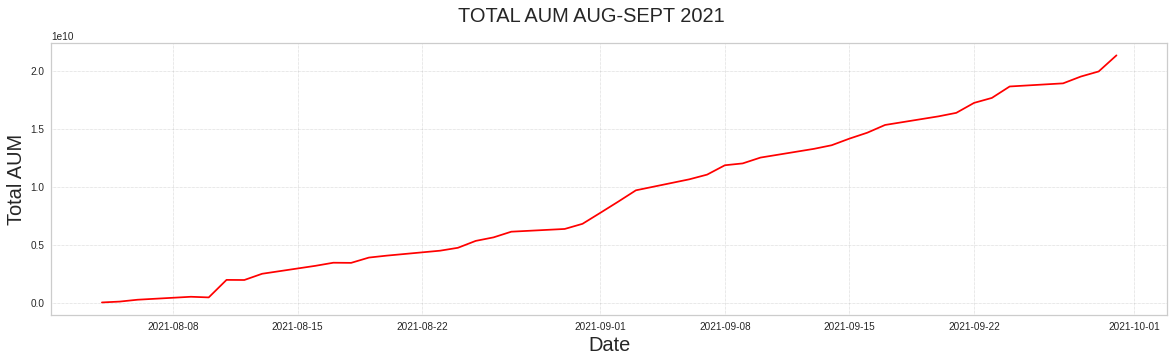

In [ ]:
# create the visualization of the data
fig = plt.figure(figsize=(20, 5))

fig.suptitle('TOTAL AUM AUG-SEPT 2021', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total AUM', fontsize=20)

x = tot_aum_d['date']
y = tot_aum_d['Total_AUM']
mean = y.mean()

plt.plot(x, y, color = 'red')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show()

### %Monthly of AUM

In [ ]:
trans_total_au = pd.DataFrame(df_c.groupby(['month'])[['Saham_AUM', 'Pasar_Uang_AUM', 'Pendapatan_Tetap_AUM', 'Campuran_AUM']].sum().T.sum()).reset_index().rename(columns={0:'Total_trans'})
trans_total_au

,month,Total_trans
0,2021-08-01,6.588112e+10
1,2021-09-01,3.215105e+11


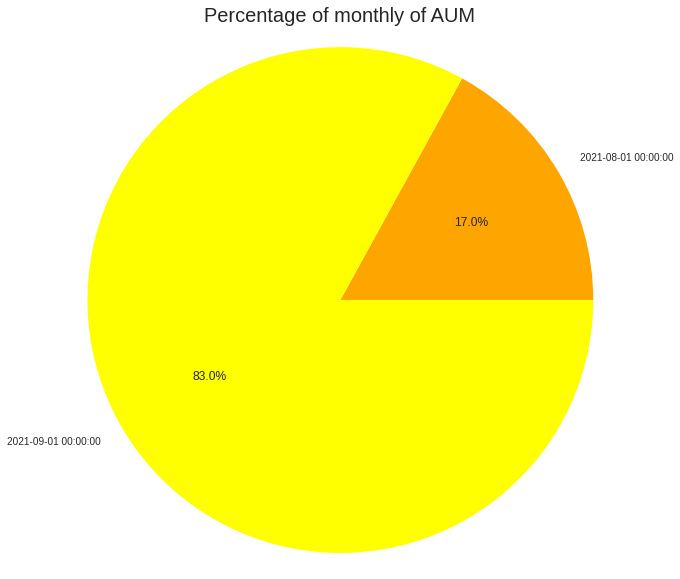

In [ ]:
plt.figure(figsize=(10, 10))

data = trans_total_au['Total_trans']
labels = trans_total_au['month']

plt.pie(data,labels=labels,autopct='%1.1f%%',colors=('orange','yellow'))
plt.title('Percentage of monthly of AUM', fontsize=20)
plt.axis('equal')
plt.show()

### Trend of Invested Amount AUG-SEPT

In [ ]:
inv_tot = pd.DataFrame(df_c.groupby(['date'])[['Saham_invested_amount','Pasar_Uang_invested_amount','Pendapatan_Tetap_invested_amount','Campuran_invested_amount']].sum().T.sum()).reset_index().rename(columns={0:'Total_inves'})
inv_tot

,date,Total_inves
0,2021-08-04,5.415833e+07
1,2021-08-05,1.287660e+08
2,2021-08-06,2.869330e+08
3,2021-08-09,5.434565e+08
4,2021-08-10,4.909342e+08
5,2021-08-11,2.011183e+09
6,2021-08-12,1.997852e+09
7,2021-08-13,2.540047e+09
8,2021-08-16,3.242753e+09
9,2021-08-17,3.508943e+09


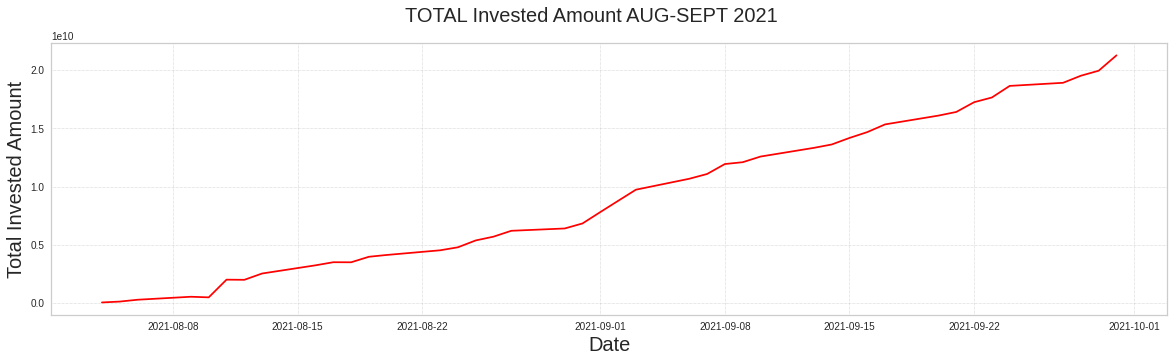

In [ ]:
fig = plt.figure(figsize=(20, 5))

fig.suptitle('TOTAL Invested Amount AUG-SEPT 2021', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Invested Amount', fontsize=20)

x = inv_tot['date']
y = inv_tot['Total_inves']
mean = y.mean()

plt.plot(x, y, color = 'red')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show()

### %Monthly of Invested Amount

In [ ]:
inv_to = pd.DataFrame(df_c.groupby(['month'])[['Saham_invested_amount','Pasar_Uang_invested_amount','Pendapatan_Tetap_invested_amount','Campuran_invested_amount']].sum().T.sum()).reset_index().rename(columns={0:'Total_inves'})
inv_to

,month,Total_inves
0,2021-08-01,6.627736e+10
1,2021-09-01,3.216106e+11


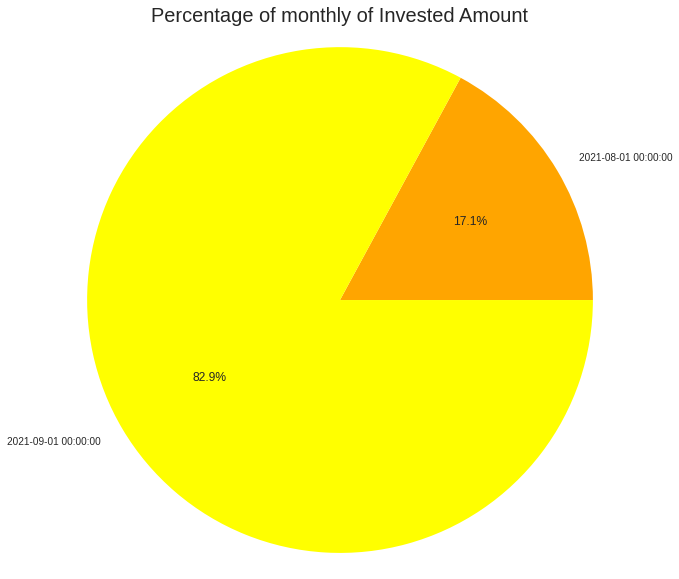

In [ ]:
plt.figure(figsize=(10, 10))

data = inv_to['Total_inves']
labels = inv_to['month']

plt.pie(data,labels=labels,autopct='%1.1f%%',colors=('orange','yellow'))
plt.title('Percentage of monthly of Invested Amount', fontsize=20)
plt.axis('equal')
plt.show()

### EDA income user of occupation 

In [ ]:
pd.crosstab(df_us['user_occupation'], df_us['user_income_source'])

user_income_source,Bunga Simpanan,Dari Orang Tua / Anak,Dari Suami / istri,Gaji,Hasil Investasi,Keuntungan Bisnis,Lainnya,Tabungan,Undian,Warisan
user_occupation,,,,,,,,,,
Guru,0,6,5,81,0,12,1,1,0,0
IRT,3,173,157,310,14,211,24,23,13,6
Others,0,60,13,1146,24,274,75,40,49,2
PNS,0,1,0,181,0,4,3,2,0,0
Pelajar,13,944,37,4483,102,855,200,307,923,23
Pengusaha,2,21,15,272,5,223,35,12,5,8
Pensiunan,0,0,1,0,0,1,0,2,1,0
Swasta,6,102,72,2617,20,325,76,31,10,4
TNI/Polisi,0,0,0,41,0,3,0,1,0,0


### Daily transaction user

In [ ]:
# user yang melakukan transaksi
daily_trans = df_c.groupby(['date']).nunique()['user_id'].reset_index()
daily_trans

,date,user_id
0,2021-08-04,117
1,2021-08-05,204
2,2021-08-06,315
3,2021-08-09,426
4,2021-08-10,577
5,2021-08-11,991
6,2021-08-12,991
7,2021-08-13,1117
8,2021-08-16,1350
9,2021-08-17,1474


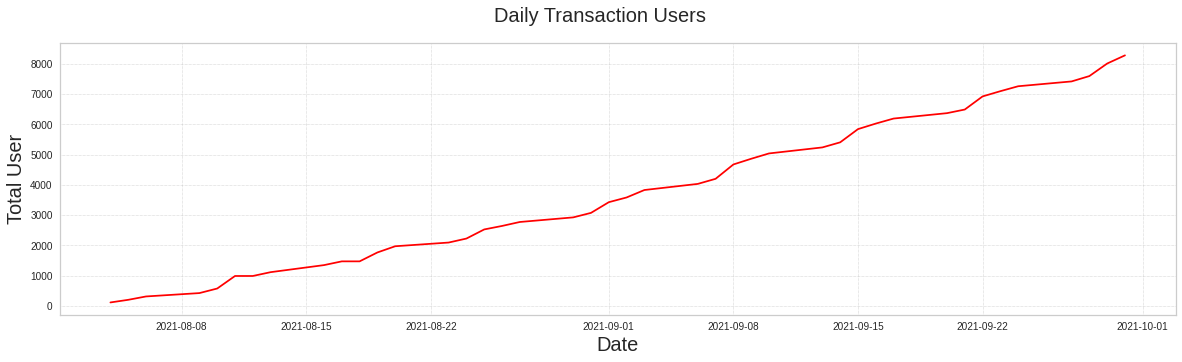

In [ ]:
# create the visualization of the data
fig = plt.figure(figsize=(20, 5))

fig.suptitle('Daily Transaction Users', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total User', fontsize=20)

x = daily_trans['date']
y = daily_trans['user_id']
mean = y.mean()

plt.plot(x, y, color = 'red')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show()

### % Gender transacting on AUG-SEPT

In [ ]:
gen = df_c.groupby(['user_gender']).nunique()['user_id'].reset_index()
gen

,user_gender,user_id
0,Female,3101
1,Male,5176


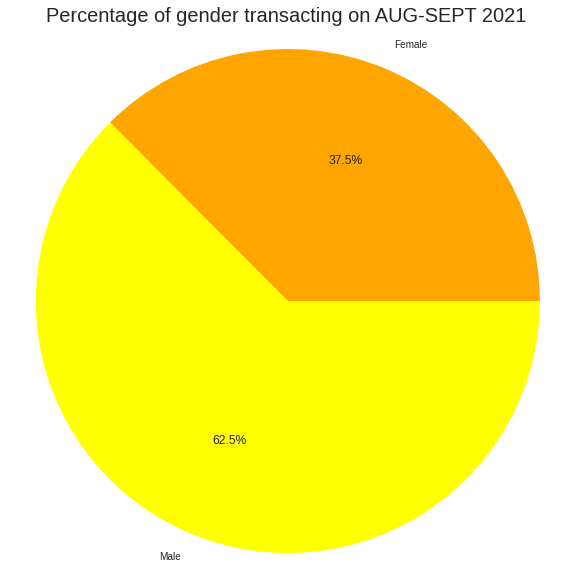

In [ ]:
plt.figure(figsize=(10, 10))

data = gen['user_id']
labels = gen['user_gender']

plt.pie(data,labels=labels,autopct='%1.1f%%',colors=('orange','yellow'))
plt.title('Percentage of gender transacting on AUG-SEPT 2021', fontsize=20)
plt.axis('equal')
plt.show()

# MILESTONE 2

mengambil data caracter yang diperlukan dari data clean yang sudah d merge.

In [ ]:
df_a = df_c[['user_id','user_gender','user_age','user_occupation','user_income_range','referral_code_used']]
df_a

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,NONE
1,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,NONE
2,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,NONE
3,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,NONE
4,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,NONE
...,...,...,...,...,...,...
158806,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NONE
158807,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NONE
158808,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NONE
158809,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NONE


menghapus duplicate berdasarkan user_id

In [ ]:
df_user = df_a.drop_duplicates(['user_id'])

In [ ]:
df_c = df_c[df_c['month'] == '2021-09']

mengitung ada berapa frequency transaksi per user di bulan Septermber 2021

In [ ]:
df_freq = df_c.groupby(['user_id','month'])['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'].count()
df_freq

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,,Saham_transaction_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_transaction_amount,Campuran_transaction_amount
user_id,month,,,,
50701,2021-09-01,22,22,22,22
50961,2021-09-01,22,22,22,22
53759,2021-09-01,22,22,22,22
54759,2021-09-01,22,22,22,22
61414,2021-09-01,22,22,22,22
...,...,...,...,...,...
4165020,2021-09-01,1,1,1,1
4165132,2021-09-01,1,1,1,1
4165630,2021-09-01,1,1,1,1


In [ ]:
df_freq = df_freq.rename(columns = {"Saham_transaction_amount":"Saham_freq_trans","Pasar_Uang_transaction_amount":"PasarUang_freq_trans","Pendapatan_Tetap_transaction_amount":"Pendapatan_Tetap_Freq_trans",	"Campuran_transaction_amount":"Campuran_freq_trans"})

menghitung data jumlah amount inves masing masing user di bulan September 2021

In [ ]:
df_inv = df_c.groupby(['user_id','month'])['Saham_invested_amount','Pasar_Uang_invested_amount','Pendapatan_Tetap_invested_amount','Campuran_invested_amount'].sum()
df_inv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
user_id,month,,,,
50701,2021-09-01,0.0,0.0,0.0,220000000.0
50961,2021-09-01,37700000.0,2800000.0,5600000.0,0.0
53759,2021-09-01,1540000.0,220000.0,440000.0,0.0
54759,2021-09-01,0.0,222000000.0,0.0,0.0
61414,2021-09-01,0.0,0.0,0.0,0.0
...,...,...,...,...,...
4165020,2021-09-01,0.0,0.0,0.0,0.0
4165132,2021-09-01,0.0,10000.0,0.0,0.0
4165630,2021-09-01,40000.0,10000.0,50000.0,0.0


menggabungkan data caracter, frequency transaksi, dan total inves

In [ ]:
df_merge_clu = pd.merge(df_user,df_freq,  how= 'inner', on = ['user_id'])
df_merge_clu = pd.merge(df_merge_clu,df_inv,  how= 'inner', on = ['user_id'])
df_merge_clu

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,Saham_freq_trans,PasarUang_freq_trans,Pendapatan_Tetap_Freq_trans,Campuran_freq_trans,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,NONE,22,22,22,22,5280000.0,880000.0,5940000.0,0.0
1,3802293,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,22,22,22,22,120240000.0,18200000.0,43560000.0,0.0
2,3049927,Male,53,Swasta,< 10 Juta,NONE,7,7,7,7,80000.0,20000.0,100000.0,5399000.0
3,3836491,Male,59,Others,< 10 Juta,used referral,7,7,7,7,0.0,70000.0,0.0,0.0
4,3783302,Male,57,Swasta,> Rp 50 Juta - 100 Juta,NONE,11,11,11,11,5550000.0,1500000.0,8281293.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NONE,22,22,22,22,2340000.0,520000.0,2382274.0,0.0
8273,3798265,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,22,22,22,22,0.0,0.0,0.0,0.0
8274,3670811,Male,49,Swasta,> Rp 50 Juta - 100 Juta,NONE,22,22,22,22,2820000.0,2860000.0,2090000.0,0.0
8275,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,NONE,22,22,22,22,0.0,0.0,0.0,0.0


In [ ]:
df_merge_clu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           8277 non-null   int64  
 1   user_gender                       8277 non-null   object 
 2   user_age                          8277 non-null   int64  
 3   user_occupation                   8277 non-null   object 
 4   user_income_range                 8277 non-null   object 
 5   referral_code_used                8277 non-null   object 
 6   Saham_freq_trans                  8277 non-null   int64  
 7   PasarUang_freq_trans              8277 non-null   int64  
 8   Pendapatan_Tetap_Freq_trans       8277 non-null   int64  
 9   Campuran_freq_trans               8277 non-null   int64  
 10  Saham_invested_amount             8277 non-null   float64
 11  Pasar_Uang_invested_amount        8277 non-null   float64
 12  Pendap

In [ ]:
# # df_clus = df_merge_clu[df_merge_clu['month'] == '2021-09']
df_cluster = df_merge_clu.copy()
# df_cluster

In [ ]:
# df_cluster.drop(['registration_import_date','user_income_source'],axis=1,inplace=True)

In [ ]:
df_09 = df_merge_clu.copy()

In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           8277 non-null   int64  
 1   user_gender                       8277 non-null   object 
 2   user_age                          8277 non-null   int64  
 3   user_occupation                   8277 non-null   object 
 4   user_income_range                 8277 non-null   object 
 5   referral_code_used                8277 non-null   object 
 6   Saham_freq_trans                  8277 non-null   int64  
 7   PasarUang_freq_trans              8277 non-null   int64  
 8   Pendapatan_Tetap_Freq_trans       8277 non-null   int64  
 9   Campuran_freq_trans               8277 non-null   int64  
 10  Saham_invested_amount             8277 non-null   float64
 11  Pasar_Uang_invested_amount        8277 non-null   float64
 12  Pendap

melabeli user_gender dan referral_code

female 0
male 1

referral_code_used

none 0
code refferal 1

In [ ]:
label = LabelEncoder()

for cat_var in ['user_gender', 'referral_code_used']:
    df_cluster[cat_var] = label.fit_transform(df_cluster[cat_var])  
df_cluster

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,Saham_freq_trans,PasarUang_freq_trans,Pendapatan_Tetap_Freq_trans,Campuran_freq_trans,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
0,3816789,0,53,IRT,> Rp 50 Juta - 100 Juta,0,22,22,22,22,5280000.0,880000.0,5940000.0,0.0
1,3802293,0,47,PNS,> Rp 500 Juta - 1 Miliar,1,22,22,22,22,120240000.0,18200000.0,43560000.0,0.0
2,3049927,1,53,Swasta,< 10 Juta,0,7,7,7,7,80000.0,20000.0,100000.0,5399000.0
3,3836491,1,59,Others,< 10 Juta,1,7,7,7,7,0.0,70000.0,0.0,0.0
4,3783302,1,57,Swasta,> Rp 50 Juta - 100 Juta,0,11,11,11,11,5550000.0,1500000.0,8281293.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,1,49,Swasta,> Rp 100 Juta - 500 Juta,0,22,22,22,22,2340000.0,520000.0,2382274.0,0.0
8273,3798265,0,49,IRT,Rp 10 Juta - 50 Juta,1,22,22,22,22,0.0,0.0,0.0,0.0
8274,3670811,1,49,Swasta,> Rp 50 Juta - 100 Juta,0,22,22,22,22,2820000.0,2860000.0,2090000.0,0.0
8275,3812221,1,49,PNS,> Rp 100 Juta - 500 Juta,0,22,22,22,22,0.0,0.0,0.0,0.0


In [ ]:
# df_cluster = df_cluster[['user_id','user_gender','user_age','user_occupation','user_income_range','referral_code_used','Saham_invested_amount','Saham_transaction_amount','Pasar_Uang_invested_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_invested_amount','Pendapatan_Tetap_transaction_amount','Campuran_invested_amount','Campuran_transaction_amount']]

mengelompokan user_age 



*   Lebih Dari 50 th masuk ke gen Y
*   25-50th masuk ke gen X

*   <=25th masuk ke gen Z



In [ ]:
df_cluster.loc[df_cluster['user_age'] >= 51, 'age'] = 'gen Y'
df_cluster.loc[df_cluster['user_age'].between(25,50),'age'] = 'gen X'
df_cluster.loc[df_cluster['user_age'] <=24, 'age'] = 'gen Z'

In [ ]:
df_cluster

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,Saham_freq_trans,PasarUang_freq_trans,Pendapatan_Tetap_Freq_trans,Campuran_freq_trans,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount,age
0,3816789,0,53,IRT,> Rp 50 Juta - 100 Juta,0,22,22,22,22,5280000.0,880000.0,5940000.0,0.0,gen Y
1,3802293,0,47,PNS,> Rp 500 Juta - 1 Miliar,1,22,22,22,22,120240000.0,18200000.0,43560000.0,0.0,gen X
2,3049927,1,53,Swasta,< 10 Juta,0,7,7,7,7,80000.0,20000.0,100000.0,5399000.0,gen Y
3,3836491,1,59,Others,< 10 Juta,1,7,7,7,7,0.0,70000.0,0.0,0.0,gen Y
4,3783302,1,57,Swasta,> Rp 50 Juta - 100 Juta,0,11,11,11,11,5550000.0,1500000.0,8281293.0,0.0,gen Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,1,49,Swasta,> Rp 100 Juta - 500 Juta,0,22,22,22,22,2340000.0,520000.0,2382274.0,0.0,gen X
8273,3798265,0,49,IRT,Rp 10 Juta - 50 Juta,1,22,22,22,22,0.0,0.0,0.0,0.0,gen X
8274,3670811,1,49,Swasta,> Rp 50 Juta - 100 Juta,0,22,22,22,22,2820000.0,2860000.0,2090000.0,0.0,gen X
8275,3812221,1,49,PNS,> Rp 100 Juta - 500 Juta,0,22,22,22,22,0.0,0.0,0.0,0.0,gen X


di split berdasarkan age, user_ocupation, dan user_income_range, agar mendapatkan angka yang dapat di cluster

In [ ]:
df_cluster = pd.get_dummies(df_cluster, columns=['age','user_occupation','user_income_range'])

In [ ]:
df_cluster.drop(['user_age'],axis=1,inplace=True)

In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 29 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   user_id                                     8277 non-null   int64  
 1   user_gender                                 8277 non-null   int64  
 2   referral_code_used                          8277 non-null   int64  
 3   Saham_freq_trans                            8277 non-null   int64  
 4   PasarUang_freq_trans                        8277 non-null   int64  
 5   Pendapatan_Tetap_Freq_trans                 8277 non-null   int64  
 6   Campuran_freq_trans                         8277 non-null   int64  
 7   Saham_invested_amount                       8277 non-null   float64
 8   Pasar_Uang_invested_amount                  8277 non-null   float64
 9   Pendapatan_Tetap_invested_amount            8277 non-null   float64
 10  Campuran_inv

dapat di lihat format datanya ada yang bukan berupa number,

oleh karena itu di scaler untuk mengubah format data menjadi number, agar dapat di olah

In [ ]:
scaler = MinMaxScaler()
df_data = df_cluster.set_index('user_id')
df_data[:] = scaler.fit_transform(df_data[:])
df_data

,user_gender,referral_code_used,Saham_freq_trans,PasarUang_freq_trans,Pendapatan_Tetap_Freq_trans,Campuran_freq_trans,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount,...,user_occupation_Pengusaha,user_occupation_Pensiunan,user_occupation_Swasta,user_occupation_TNI/Polisi,user_income_range_< 10 Juta,user_income_range_> Rp 1 Miliar,user_income_range_> Rp 100 Juta - 500 Juta,user_income_range_> Rp 50 Juta - 100 Juta,user_income_range_> Rp 500 Juta - 1 Miliar,user_income_range_Rp 10 Juta - 50 Juta
user_id,,,,,,,,,,,,,,,,,,,,,
3816789,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.004570,4.285742e-05,0.000278,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3802293,0.0,1.0,1.000000,1.000000,1.000000,1.000000,0.104068,8.863694e-04,0.002041,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3049927,1.0,0.0,0.285714,0.285714,0.285714,0.285714,0.000069,9.740323e-07,0.000005,0.000864,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3836491,1.0,1.0,0.285714,0.285714,0.285714,0.285714,0.000000,3.409113e-06,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3783302,1.0,0.0,0.476190,0.476190,0.476190,0.476190,0.004804,7.305242e-05,0.000388,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3773859,1.0,0.0,1.000000,1.000000,1.000000,1.000000,0.002025,2.532484e-05,0.000112,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3798265,0.0,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3670811,1.0,0.0,1.000000,1.000000,1.000000,1.000000,0.002441,1.392866e-04,0.000098,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 3816789 to 3881981
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   user_gender                                 8277 non-null   float64
 1   referral_code_used                          8277 non-null   float64
 2   Saham_freq_trans                            8277 non-null   float64
 3   PasarUang_freq_trans                        8277 non-null   float64
 4   Pendapatan_Tetap_Freq_trans                 8277 non-null   float64
 5   Campuran_freq_trans                         8277 non-null   float64
 6   Saham_invested_amount                       8277 non-null   float64
 7   Pasar_Uang_invested_amount                  8277 non-null   float64
 8   Pendapatan_Tetap_invested_amount            8277 non-null   float64
 9   Campuran_invested_amount                    8277 non-null   float64
 10  age

format data sudah berupa number

# Cluster Analysis
### Cluster Analysis:


memutuskan untuk menggunakan teknik cluster kmeans, karena banyak variable yang digunakan.
dan juga untuk mengetahui karakteristik dari cluster tersebut sehingga dapat pola karakteristik dan dapat memberikan rekomendasi yang sesuai dengan karakteristik dari hasil cluster.


### elbow

1 23047.496556712103
2 17636.988019427463
3 15875.643299381945
4 14369.623101212175
5 13396.518428582243
6 12495.475568912636
7 11746.534848855987
8 11406.095091073585
9 10970.679788677116
10 10436.057964245774


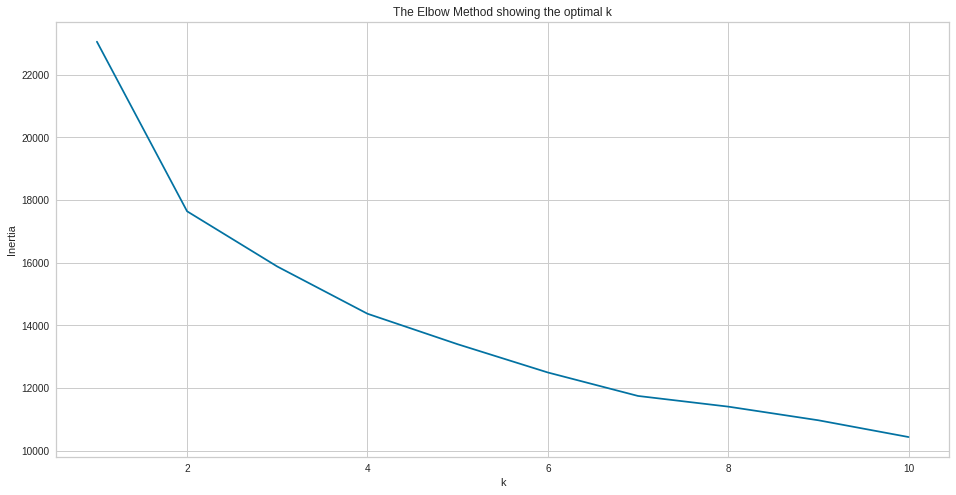

In [ ]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_data)
    distortions.append(kmeanModel.inertia_)
    print(k, kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Silhouette

For k=2, the average silhouette score is 0.23562194719796495
For k=3, the average silhouette score is 0.21563638569405127
For k=4, the average silhouette score is 0.18783603278594768
For k=5, the average silhouette score is 0.19251958195879734
For k=6, the average silhouette score is 0.1979982702307366
For k=7, the average silhouette score is 0.2168569414815297
For k=8, the average silhouette score is 0.2068672151215193
For k=9, the average silhouette score is 0.2063216274487218
For k=10, the average silhouette score is 0.2229766886265239


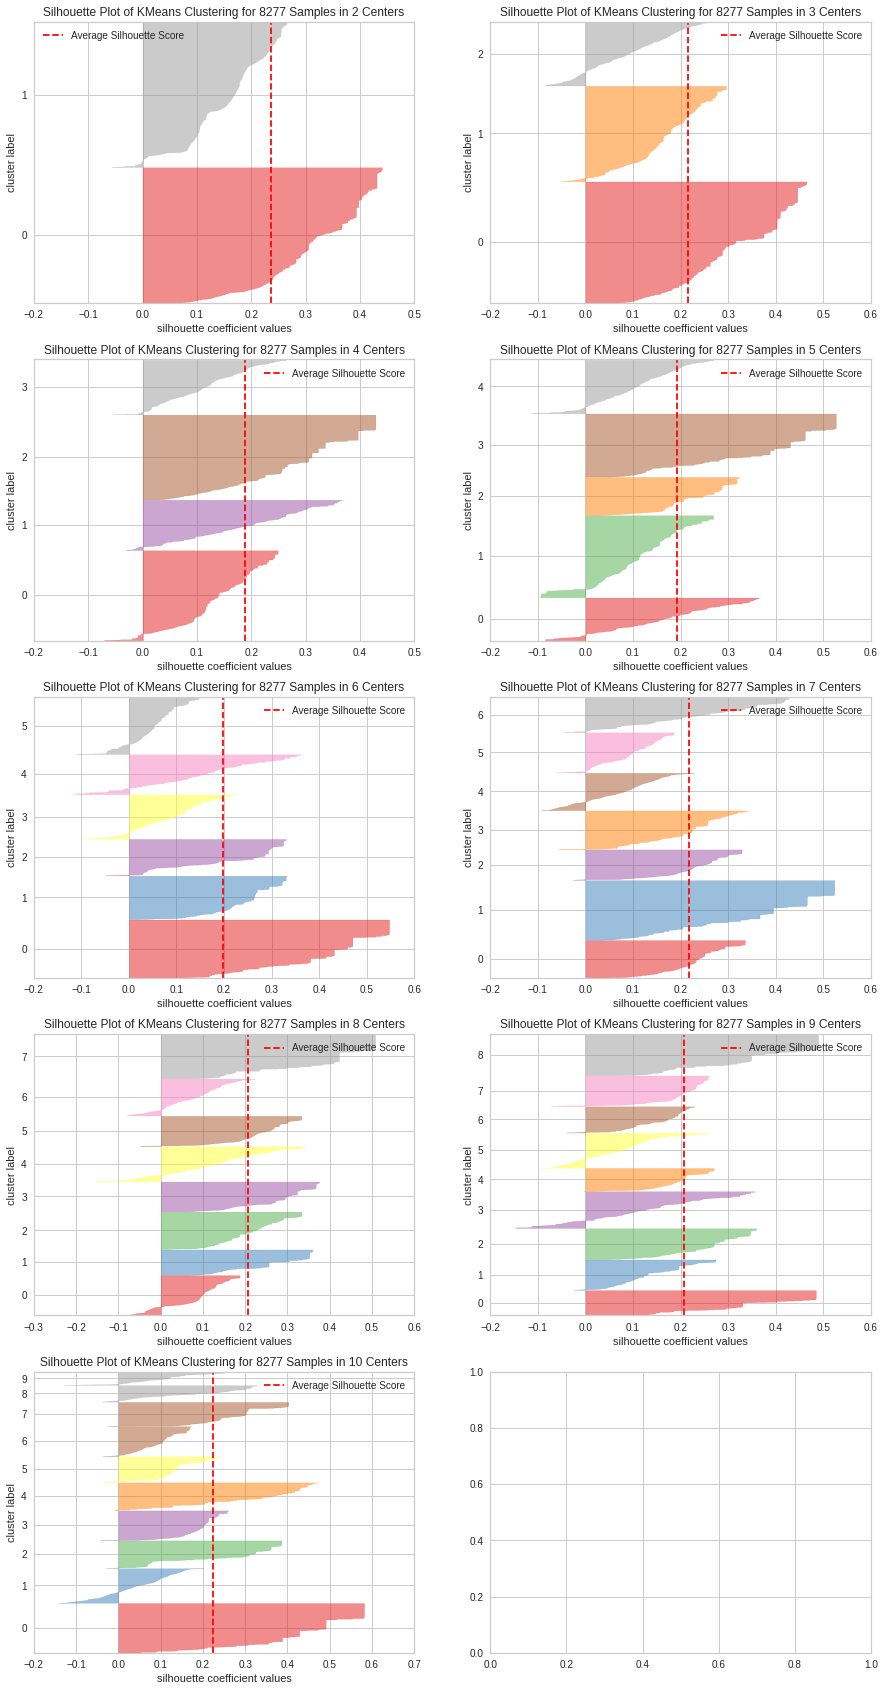

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(df_data)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

dapat di lihat dari elbow patahannya terdapat di k ke 2 dan 

dapat di lihat dari sillhouette nilai tertinggi yang mendekati angka 1 yaitu di k ke 2

sehingga memutuskan menggukan n_cluster ke 2 untuk cluster model

In [ ]:
cluster_model = cluster.KMeans(n_clusters=2)
cluster_model.fit(df_data)
cluster_label = cluster_model.labels_
df_data['cluster'] = cluster_label
df_3 = df_data.reset_index()[['user_id','cluster']]
df_3

,user_id,cluster
0,3816789,1
1,3802293,1
2,3049927,1
3,3836491,1
4,3783302,1
...,...,...
8272,3773859,1
8273,3798265,1
8274,3670811,1
8275,3812221,1


user d pisahkan berdasarkan cluster

In [ ]:
df_3 = pd.merge(df_09, df_3, on=['user_id'])
df_3

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,Saham_freq_trans,PasarUang_freq_trans,Pendapatan_Tetap_Freq_trans,Campuran_freq_trans,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount,cluster
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,NONE,22,22,22,22,5280000.0,880000.0,5940000.0,0.0,1
1,3802293,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,22,22,22,22,120240000.0,18200000.0,43560000.0,0.0,1
2,3049927,Male,53,Swasta,< 10 Juta,NONE,7,7,7,7,80000.0,20000.0,100000.0,5399000.0,1
3,3836491,Male,59,Others,< 10 Juta,used referral,7,7,7,7,0.0,70000.0,0.0,0.0,1
4,3783302,Male,57,Swasta,> Rp 50 Juta - 100 Juta,NONE,11,11,11,11,5550000.0,1500000.0,8281293.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NONE,22,22,22,22,2340000.0,520000.0,2382274.0,0.0,1
8273,3798265,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,22,22,22,22,0.0,0.0,0.0,0.0,1
8274,3670811,Male,49,Swasta,> Rp 50 Juta - 100 Juta,NONE,22,22,22,22,2820000.0,2860000.0,2090000.0,0.0,1
8275,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,NONE,22,22,22,22,0.0,0.0,0.0,0.0,1


memisahkan umur user berdasarkan generasi

In [ ]:
df_3.loc[df_3['user_age'] >= 51, 'age'] = 'gen X'
df_3.loc[df_3['user_age'].between(25,50),'age'] = 'gen Y'
df_3.loc[df_3['user_age'] <=24, 'age'] = 'gen Z'

In [ ]:
df_3

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,Saham_freq_trans,PasarUang_freq_trans,Pendapatan_Tetap_Freq_trans,Campuran_freq_trans,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount,cluster,age
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,NONE,22,22,22,22,5280000.0,880000.0,5940000.0,0.0,1,gen X
1,3802293,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,22,22,22,22,120240000.0,18200000.0,43560000.0,0.0,1,gen Y
2,3049927,Male,53,Swasta,< 10 Juta,NONE,7,7,7,7,80000.0,20000.0,100000.0,5399000.0,1,gen X
3,3836491,Male,59,Others,< 10 Juta,used referral,7,7,7,7,0.0,70000.0,0.0,0.0,1,gen X
4,3783302,Male,57,Swasta,> Rp 50 Juta - 100 Juta,NONE,11,11,11,11,5550000.0,1500000.0,8281293.0,0.0,1,gen X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,3773859,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NONE,22,22,22,22,2340000.0,520000.0,2382274.0,0.0,1,gen Y
8273,3798265,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,22,22,22,22,0.0,0.0,0.0,0.0,1,gen Y
8274,3670811,Male,49,Swasta,> Rp 50 Juta - 100 Juta,NONE,22,22,22,22,2820000.0,2860000.0,2090000.0,0.0,1,gen Y
8275,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,NONE,22,22,22,22,0.0,0.0,0.0,0.0,1,gen Y


dapat di lihat di bawah total user berdasarkan cluster

In [ ]:
df_3.groupby(['cluster'])[['user_id']].count()

,user_id
cluster,
0,4004
1,4273


mengcategorikan colom colom yang ada di data frame yang d cluster, agar dapat melihat carakteristik hasil cluster dan dapat merekomendasikan dari hasil temuan

In [ ]:
categori_col = ['user_gender','age','user_occupation','user_income_range','referral_code_used']
inves_col = ['Saham_invested_amount','Pasar_Uang_invested_amount','Pendapatan_Tetap_invested_amount','Campuran_invested_amount']
trans_col = ['Saham_freq_trans',	'PasarUang_freq_trans',	'Pendapatan_Tetap_Freq_trans',	'Campuran_freq_trans']

In [ ]:
df_cluster0 = df_3[df_3['cluster'] == 0]

for col in categori_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster0[col].value_counts(normalize=True))
  print('\n')

df_inves = df_cluster0[inves_col].agg(['mean'])
df_trans = df_cluster0[trans_col].agg(['min','max'])

print(df_trans)
df_inves

Value counts on user_gender collumn:
Male      0.649351
Female    0.350649
Name: user_gender, dtype: float64


Value counts on age collumn:
gen Z    1.0
Name: age, dtype: float64


Value counts on user_occupation collumn:
Pelajar       0.843407
Others        0.094655
Swasta        0.037213
IRT           0.014735
Pengusaha     0.007243
TNI/Polisi    0.001249
Guru          0.000749
PNS           0.000749
Name: user_occupation, dtype: float64


Value counts on user_income_range collumn:
< 10 Juta                   0.633117
Rp 10 Juta - 50 Juta        0.285465
> Rp 50 Juta - 100 Juta     0.070929
> Rp 100 Juta - 500 Juta    0.009491
> Rp 1 Miliar               0.000999
Name: user_income_range, dtype: float64


Value counts on referral_code_used collumn:
NONE             0.617632
used referral    0.382368
Name: referral_code_used, dtype: float64


     Saham_freq_trans  PasarUang_freq_trans  Pendapatan_Tetap_Freq_trans  \
min                 1                     1                          

,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
mean,1.779896e+06,3.432949e+06,4.350332e+06,806581.224775


*karakteristik cluster = 0*

male user 60%

di dominasi oleh gen Y 95%

swasta 40%

Rp 10 Juta - 50 Juta  36%

tidak ada code refferal 67%

rata rata tertinggi di pendapatan tetap inves

In [ ]:
df_cluster1 = df_3[df_3['cluster'] == 1]

for col in categori_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster0[col].value_counts(normalize=True))
  print('\n')

df_inves = df_cluster1[inves_col].agg(['mean'])
df_trans = df_cluster1[trans_col].agg(['min','max'])

print(df_trans)
df_inves

Value counts on user_gender collumn:
Male      0.649351
Female    0.350649
Name: user_gender, dtype: float64


Value counts on age collumn:
gen Z    1.0
Name: age, dtype: float64


Value counts on user_occupation collumn:
Pelajar       0.843407
Others        0.094655
Swasta        0.037213
IRT           0.014735
Pengusaha     0.007243
TNI/Polisi    0.001249
Guru          0.000749
PNS           0.000749
Name: user_occupation, dtype: float64


Value counts on user_income_range collumn:
< 10 Juta                   0.633117
Rp 10 Juta - 50 Juta        0.285465
> Rp 50 Juta - 100 Juta     0.070929
> Rp 100 Juta - 500 Juta    0.009491
> Rp 1 Miliar               0.000999
Name: user_income_range, dtype: float64


Value counts on referral_code_used collumn:
NONE             0.617632
used referral    0.382368
Name: referral_code_used, dtype: float64


     Saham_freq_trans  PasarUang_freq_trans  Pendapatan_Tetap_Freq_trans  \
min                 1                     1                          

,Saham_invested_amount,Pasar_Uang_invested_amount,Pendapatan_Tetap_invested_amount,Campuran_invested_amount
mean,7.580756e+06,1.906769e+07,3.274536e+07,6.155016e+06


*karakteristik cluster = 1*

male user 65%

di dominasi oleh gen Z 100%

pelajar 84%

< 10 juta  63%

tidak ada code refferal 62%

rata rata tertinggi di pendapatan tetap inves

### Characteristics Cluster

dari cluster 0 dapat di lihat 60 % pengguna rentang umur di antara 25th dan 50th,   pekerja sektor swasta, dan melakukan transaksi di setiap jenis reksa dana. 
Rekomendasi:

1.  adakan promo cashback dalam bentuk koin digital yang dapat digunakan untuk transaksi. Sehingga dapat mendorong mereka untuk terus melakukan transaksi di platform kami. 
2. kasih rekomendasi untuk membandingkan jumlah investasi di setiap jenis reksa dana. Sehingga dapat mengkompori mereka untuk mencoba investasi jenis lain. 
3. Kasih keuntungan untuk yang sudah investasi jangka panjang.

dari cluster 1 dapat di lihat 100 % pengguna rentang umur di dibawah 25 th,   merupakan seorang pelajar, dan melakukan transaksi di setiap jenis reksa dana. 
Rekomendasi:

adakan promo untuk menggunakan kode referensi sehingga mereka ingin mengundang teman-teman mereka untuk bergabung dengan kami.

### New Segment Recommendation

Strategi ini tentunya bertujuan untuk memberikan skema investasi yang lebih stabil dan menjaga return yang optimal di tengah dinamika yang terjadi.

“Crazy Rich circle ” segmen yang baru ini merupakan sebuah racikan strategi terbaik berdasarkan kondisi paling terkini. memiliki risiko relatif lebih rendah sehingga menurunkan risiko volatilitas dengan berinvestasi pada >50% obligasi pemerintah, dan sisanya pada obligasi korporasi.Kami berharap reksadana dapat menjadi pilihan bagi Crazy Rich yang mencari produk investasi dengan stabilitas yang relatif terkendali sekaligus tetap memberikan imbal hasil yang menguntungkan. 
